## Exercises II
Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire `bedroomcnt`, `bathroomcnt`, `calculatedfinishedsquarefeet`, `taxvaluedollarcnt`, `yearbuilt`, `taxamount`, and `fips` from the `zillow` database for all 'Single Family Residential' properties.

1. Using your acquired Zillow data, walk through the summarization and cleaning steps in your `wrangle.ipynb` file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.

1. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your `wrangle.py` file. Name your final function `wrangle_zillow`.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import os
from env import host, user, password
import numpy as np
import pandas as pd

## Acquire

In [2]:
################### Connects to Sequel Ace using credentials ###################

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    It takes in a string name of a database as an argument.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

################### Create new dataframe from SQL db ###################
    
def new_zillow_data():
    '''
    This function reads the zillow data from the Codeup db into a df,
    writes it to a csv file, and returns the df.
    '''

    # Create SQL query.
    sql_query = """
           SELECT bedroomcnt, 
               bathroomcnt, 
               calculatedfinishedsquarefeet, 
               taxvaluedollarcnt, 
               yearbuilt, 
               taxamount, 
               fips
            FROM properties_2017
            WHERE propertylandusetypeid = 261;            
            """
    # Read in DataFrame from Codeup's SQL db.
    df = pd.read_sql(sql_query, get_connection('zillow'))
    
    return df


################### Acquire existing csv file ###################

def get_zillow_data():
    '''
    This function reads in zillow data from Codeup database, writes data to
    a csv file if a local file does not exist, and returns a df.
    '''
    if os.path.isfile('zillow.csv'):
        
        # If csv file exists, read in data from csv file.
        df = pd.read_csv('zillow.csv', index_col=0)
        
    else:
        
        # Read fresh data from db into a DataFrame.
        df = new_zillow_data()
        
        # Write DataFrame to a csv file.
        df.to_csv('zillow.csv')
        
    return df

In [3]:
df = get_zillow_data()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [4]:
df.shape

(2152863, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2152863 entries, 0 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 131.4 MB


In [6]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.152852e+06,2.152852e+06,2.144379e+06,2.152370e+06,2.143526e+06,2.148421e+06,2.152863e+06
mean,3.287196e+00,2.230688e+00,1.862855e+03,4.618962e+05,1.960950e+03,5.634866e+03,6.048377e+03
std,9.547544e-01,9.992796e-01,1.222125e+03,6.996760e+05,2.216220e+01,8.178910e+03,2.043329e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.801000e+03,1.850000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.257000e+03,1.881702e+05,1.949000e+03,2.534980e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.623000e+03,3.276710e+05,1.958000e+03,4.108950e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.208000e+03,5.345270e+05,1.976000e+03,6.414320e+03,6.059000e+03
max,2.500000e+01,3.200000e+01,9.525760e+05,9.842891e+07,2.016000e+03,1.337756e+06,6.111000e+03


In [7]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

In [8]:
df.nunique()

bedroomcnt                          19
bathroomcnt                         38
calculatedfinishedsquarefeet     10580
taxvaluedollarcnt               592269
yearbuilt                          153
taxamount                       918838
fips                                 3
dtype: int64

In [9]:
df.duplicated().sum()

11644

#### Acquire and Summarize Takeaways

- All columns but `fips` are missing values
- Why are `bedroomcnt` and `yearbuilt` floats?
    - Should they be changed to ints?
- `calculatedfinishedsquarefeet` and `yearbuilt` are missing almost over 8000 values
- We have duplicated results but cause is unknown
    - Multiple units built the same
    - One unit inputted more than once
- `fips` is the zipcode and is missing the first digit
    - will caste to string and add 0 to front

## Prepare the Data

### Address the null values

In [10]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8484
taxvaluedollarcnt                493
yearbuilt                       9337
taxamount                       4442
fips                               0
dtype: int64

I will drop all missing values since they do not make up a large fraction of the original dataset

In [11]:
df.dropna(axis=0, inplace=True)
df.isnull().any()

bedroomcnt                      False
bathroomcnt                     False
calculatedfinishedsquarefeet    False
taxvaluedollarcnt               False
yearbuilt                       False
taxamount                       False
fips                            False
dtype: bool

In [12]:
df.shape

(2140235, 7)

### Address the duplicates

In [13]:
df.duplicated().sum()

10021

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [15]:
df.shape

(2130214, 7)

### Change dtypes

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 130.0 MB


In [17]:
df['bedroomcnt'] = df.bedroomcnt.astype(int)

In [18]:
df['yearbuilt'] = df.yearbuilt.astype(int)

In [19]:
df['fips'] = '0' + df.fips.astype(int).astype(str)

In [20]:
df['fips'].value_counts()

06037    1422505
06059     546579
06111     161130
Name: fips, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2130214 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    int64  
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     int64  
 5   taxamount                     float64
 6   fips                          object 
dtypes: float64(4), int64(2), object(1)
memory usage: 130.0+ MB


#### Prepare Takeaways

- We dropped 22,649 observations
    - 12,628 had missing values
    - 10,021 were duplicate rows
- `bedroomcnt` changed to int (can't have less than a whole bedroom)
- `yearbuilt` changed to int
- `fips` changed to string and add '0' to beginning to represent zipcode

## Visualize Distributions

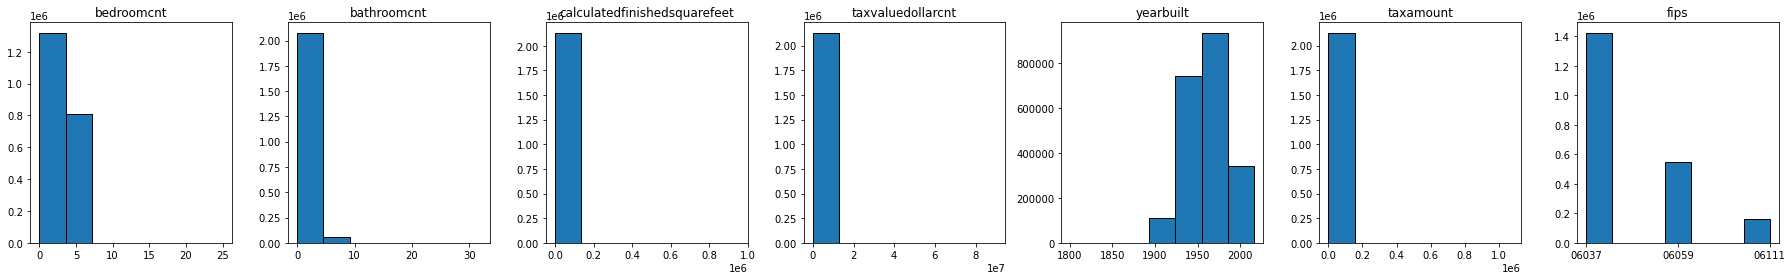

In [25]:
plt.figure(figsize=(25,4))

for i, col in enumerate(df.columns):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    df[col].hist(bins=7, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    # fit plots clearly
    plt.tight_layout()

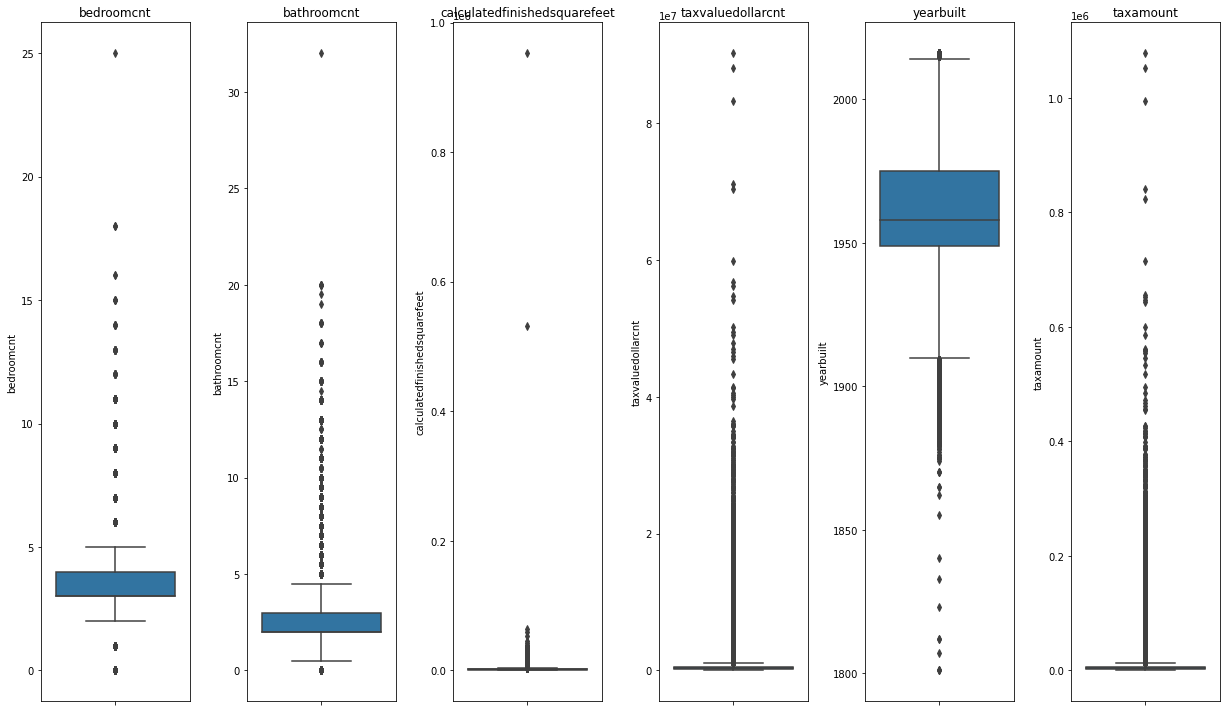

In [24]:
plt.figure(figsize=(20,10))
plt.title('Box plots')
for i, col in enumerate(df.drop(columns='fips').columns):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    sns.boxplot(data=df, y=col)
    
    # Hide gridlines.
    plt.grid(False)
    
    # Show empty x-label
    plt.xlabel('')
    
    # fit plots clearly
    plt.tight_layout()

#### Viz Takeaways

- `taxvaluedollarcnt`, `taxamount`, and `calculatedfinishedsquarefeet` have the most extreme outliers
- since these arent scaled, it is difficult to make many assumptions
- will also have to appropriately handle outliers to avoid skewing data